# Testing JWST

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) # uncomment to see all the rows in a dataframe

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

from astropy.io import fits
from astropy.coordinates import FK5, SkyCoord
import astropy.units as u

from XRBID.DataFrameMod import (Find, FindUnique)
from XRBID.CMDs import FitSED
from XRBID.WriteScript import WriteReg

import os, sys
sys.path.insert(0, '/Users/undergradstudent/Research/XRB-Analysis/Notebooks')
from helpers.analysis import remove_unnamed, XrayBinary
from helpers.analysis import (calculate_distance, calculate_velocity)

import seaborn as sns

# define directories to handle data in
cd = os.chdir
hstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/"
chandra_hst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/"
chandra_jwst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/"
jwstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/JWST/"
M66_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/"

# jwst directories
f200w = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f200w_v1p1_img.fits"
f300m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f300m_v1p1_img.fits"
f335m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f335m_v1p1_img.fits"
f360m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f360m_v1p1_img.fits"

# hst directories
f275w = hstdir+"M66_mosaic_uvis_f275w_drc_sci.fits"
f336w = hstdir+"M66_mosaic_uvis_f336w_drc_sci.fits"
f438w = hstdir+"M66_mosaic_uvis_f438w_drc_sci.fits"
f555w = hstdir+"M66_mosaic_uvis_f555w_drc_sci.fits"
f814w = hstdir+"M66_mosaic_uvis_f814w_drc_sci.fits"


In [2]:
M66_xrbs = remove_unnamed(pd.read_csv(M66_dir+"XRB-ejection/M66_hst_jwst_xrbs_photometry.csv"))

In [3]:
cscid1 = '2CXO J112014.9+125933'
source1 = M66_xrbs.query(f'`CSC ID` == "{cscid1}"')
source1

,CSC ID,RA,Dec,JWST ID,HST ID,F2000W ID,F3000M ID,F3350M ID,F3600M ID,F275W ID,F336W ID,F438W ID,F555W ID,F814W ID,F2000W,F2000W Err,F3000M,F3000M Err,F3350M,F3350M Err,F3600M,F3600M Err,F275W,F275W Err,F336W,F336W Err,F438W,F438W Err,F555W,F555W Err,F814W,F814W Err,Class,Flag,Notes,Star ID,ID,Auxiliary ID
0,2CXO J112014.9+125933,170.062313,12.992598,1,2.0,194701,45185.0,NaN,NaN,130956.0,NaN,36055.0,19247.0,NaN,-12.309132,-0.925911,-13.902257,-0.287522,NaN,NaN,NaN,NaN,-2.974469,-1.372681,NaN,NaN,-7.711479,-0.896442,-8.481385,-0.973168,NaN,NaN,HMXB,NaN,NaN,NaN,NaN,2CXO J112014.9+125933-1-2.0
1,2CXO J112014.9+125933,170.062307,12.992623,3,2.0,194908,45185.0,NaN,NaN,130956.0,NaN,36055.0,19247.0,NaN,-12.319953,-0.904646,-13.902257,-0.287522,NaN,NaN,NaN,NaN,-2.974469,-1.372681,NaN,NaN,-7.711479,-0.896442,-8.481385,-0.973168,NaN,NaN,HMXB,NaN,NaN,NaN,NaN,2CXO J112014.9+125933-3-2.0
2,2CXO J112014.9+125933,170.062255,12.992622,4,2.0,194909,NaN,NaN,NaN,130956.0,NaN,36055.0,19247.0,NaN,-12.429364,-0.794376,NaN,NaN,NaN,NaN,NaN,NaN,-2.974469,-1.372681,NaN,NaN,-7.711479,-0.896442,-8.481385,-0.973168,NaN,NaN,HMXB,NaN,NaN,NaN,NaN,2CXO J112014.9+125933-4-2.0


Finding best-fit model(s)...
DONE


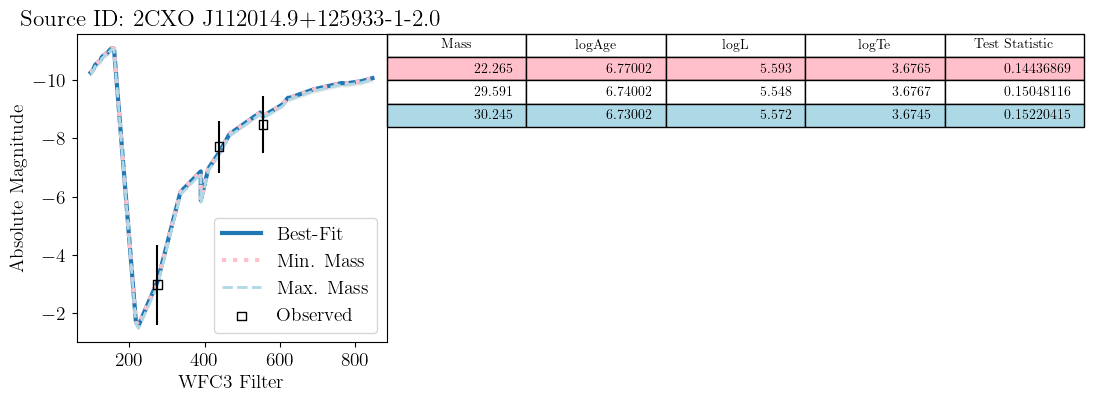

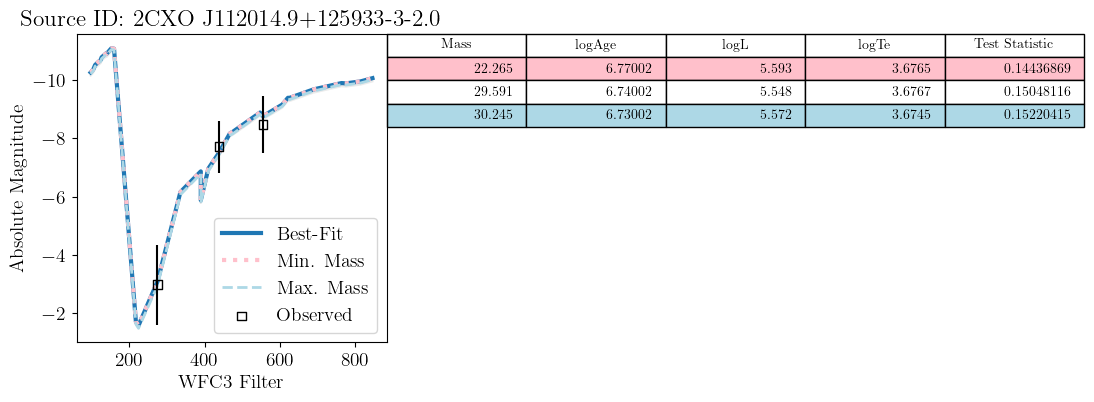

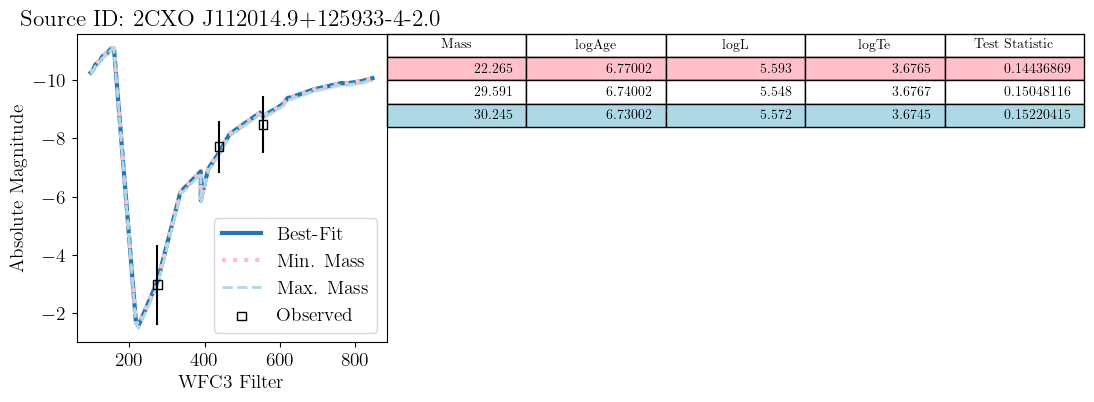

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,F390M,F410M,FQ422M,F467M,F547M,F621M,F689M,F763M,F845M,F098M,F127M,F139M,F153M,Test Statistic,Auxiliary ID
0,0.0152,0.01508,6.77002,32.460693,2.632192,22.265,5.593,3.6765,-0.149,2,0.0,0.471,0.0,0.0,-1,-0.000028,0.0,0.6368,0.3479,0.001754,0.003386,0.004925,-1.0,0.01522,-9.212,-1.710,-1.586,-3.081,-6.159,-6.868,-7.502,-8.227,-8.763,-9.159,-9.389,-9.887,-9.957,-10.365,-10.521,-10.698,-10.899,-11.077,-5.877,-6.963,-7.069,-8.169,-8.887,-9.393,-9.681,-9.898,-10.066,-10.262,-10.780,-10.916,-11.091,0.144369,2CXO J112014.9+125933-1-2.0
1,0.0152,0.01508,6.77002,32.460693,2.632192,22.265,5.593,3.6765,-0.149,2,0.0,0.471,0.0,0.0,-1,-0.000028,0.0,0.6368,0.3479,0.001754,0.003386,0.004925,-1.0,0.01522,-9.212,-1.710,-1.586,-3.081,-6.159,-6.868,-7.502,-8.227,-8.763,-9.159,-9.389,-9.887,-9.957,-10.365,-10.521,-10.698,-10.899,-11.077,-5.877,-6.963,-7.069,-8.169,-8.887,-9.393,-9.681,-9.898,-10.066,-10.262,-10.780,-10.916,-11.091,0.144369,2CXO J112014.9+125933-3-2.0
2,0.0152,0.01508,6.74002,33.157944,2.632239,29.591,5.548,3.6767,0.020,1,0.0,0.524,0.0,0.0,-1,-0.000015,0.0,0.6929,0.2919,0.002416,0.001632,0.006114,-1.0,0.01525,-9.101,-1.617,-1.502,-3.018,-6.079,-6.776,-7.404,-8.123,-8.655,-9.050,-9.279,-9.776,-9.845,-10.252,-10.408,-10.584,-10.786,-10.965,-5.795,-6.871,-6.973,-8.067,-8.779,-9.283,-9.569,-9.786,-9.954,-10.150,-10.667,-10.803,-10.978,0.150481,2CXO J112014.9+125933-1-2.0
3,0.0152,0.01508,6.74002,33.157944,2.632239,29.591,5.548,3.6767,0.020,1,0.0,0.524,0.0,0.0,-1,-0.000015,0.0,0.6929,0.2919,0.002416,0.001632,0.006114,-1.0,0.01525,-9.101,-1.617,-1.502,-3.018,-6.079,-6.776,-7.404,-8.123,-8.655,-9.050,-9.279,-9.776,-9.845,-10.252,-10.408,-10.584,-10.786,-10.965,-5.795,-6.871,-6.973,-8.067,-8.779,-9.283,-9.569,-9.786,-9.954,-10.150,-10.667,-10.803,-10.978,0.150481,2CXO J112014.9+125933-3-2.0
4,0.0152,0.01508,6.73002,34.121624,2.632301,30.245,5.572,3.6745,-0.004,1,0.0,0.521,0.0,0.0,-1,-0.000016,0.0,0.6902,0.2946,0.002362,0.001779,0.006014,-1.0,0.01524,-9.160,-1.628,-1.485,-2.936,-6.067,-6.784,-7.426,-8.158,-8.699,-9.099,-9.331,-9.832,-9.903,-10.316,-10.474,-10.652,-10.856,-11.036,-5.785,-6.881,-6.987,-8.099,-8.824,-9.334,-9.624,-9.843,-10.013,-10.212,-10.735,-10.874,-11.050,0.152204,2CXO J112014.9+125933-1-2.0
5,0.0152,0.01508,6.73002,34.121624,2.632301,30.245,5.572,3.6745,-0.004,1,0.0,0.521,0.0,0.0,-1,-0.000016,0.0,0.6902,0.2946,0.002362,0.001779,0.006014,-1.0,0.01524,-9.160,-1.628,-1.485,-2.936,-6.067,-6.784,-7.426,-8.158,-8.699,-9.099,-9.331,-9.832,-9.903,-10.316,-10.474,-10.652,-10.856,-11.036,-5.785,-6.881,-6.987,-8.099,-8.824,-9.334,-9.624,-9.843,-10.013,-10.212,-10.735,-10.874,-11.050,0.152204,2CXO J112014.9+125933-3-2.0
6,0.0152,0.01508,6.73002,34.121624,2.632301,30.245,5.572,3.6745,-0.004,1,0.0,0.521,0.0,0.0,-1,-0.000016,0.0,0.6902,0.2946,0.002362,0.001779,0.006014,-1.0,0.01524,-9.160,-1.628,-1.485,-2.936,-6.067,-6.784,-7.426,-8.158,-8.699,-9.099,-9.331,-9.832,-9.903,-10.316,-10.474,-10.652,-10.856,-11.036,-5.785,-6.881,-6.987,-8.099,-8.824,-9.334,-9.624,-9.843,-10.013,-10.212,-10.735,-10.874,-11.050,0.152204,2CXO J112014.9+125933-4-2.0
7,0.0152,0.01508,6.74002,33.157944,2.632239,29.591,5.548,3.6767,0.020,1,0.0,0.524,0.0,0.0,-1,-0.000015,0.0,0.6929,0.2919,0.002416,0.001632,0.006114,-1.0,0.01525,-9.101,-1.617,-1.502,-3.018,-6.079,-6.776,-7.404,-8.123,-8.655,-9.050,-9.279,-9.776,-9.845,-10.252,-10.408,-10.584,-10.786,-10.965,-5.795,-6.871,-6.973,-8.067,-8.779,-9.283,-9.569,-9.786,-9.954,-10.150,-10.667,-10.803,-10.978,0.150481,2CXO J112014.9+125933-4-2.0
8,0.0152,0.01508,6.77002,32.460693,2.632192,22.265,5.593,3.6765,-0.149,2,0.0,0.471,0.0,0.0,-1,-0.000028,0.0,0.6368,0.3479,0.001754,0.003386,0.004925,-1.0,0.01522,-9.212,-1.710,-1.586,-3.081,-6.159,-6.868,-7.502,-8.227,-8.763,-9.159,-9.389,-9.887,-9.957,-10.36

In [4]:
bestfit1_hst = FitSED(
    df=source1,
    instrument='wfc3',
    idheader='Auxiliary ID',
    plotSED=True,
    min_models=3
)

display(bestfit1_hst)

In [5]:
from XRBID.AutoPhots_testing import Zeropoint
filelist = [f200w, f300m, f335m, f360m]
filteridlist = ['F2000W', 'F3000M', 'F3350M', 'F3600M']

for filter, filterid in zip(filelist, filteridlist):
    filter = fits.open(filter)
    zpt = Zeropoint(filter, filterid, instrument='NIRCAM')
    print(f'{filterid}: {zpt}')

F2000W: 25.55
F3000M: 24.04
F3350M: 23.95
F3600M: 23.77


# Making my own Models

In [6]:
# This file was run on ages 3.5-10.5 deltaDex 0.02
isoheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M".split(",")
isoN = pd.read_csv("/Users/undergradstudent/Downloads/nircam_models.txt", comment="#", delim_whitespace=True, names=isoheads)

isoheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W".split(",")
tempiso = pd.read_csv("/Users/undergradstudent/Downloads/wfc3_models.txt", comment="#", delim_whitespace=True, names=isoheads)

tempiso["Mass"] = round(tempiso["Mass"], 2)
tempiso["int_IMF"] = round(tempiso["int_IMF"], 2)
tempiso["Mini"] = round(tempiso["Mini"], 3)
tempiso["logTe"] = round(tempiso["logTe"], 3)
tempiso["logg"] = round(tempiso["logg"], 3)
tempiso["logL"] = round(tempiso["logL"], 3)
tempiso["Mloss"] = round(tempiso["Mloss"], 5)

isoN["Mass"] = round(isoN["Mass"], 2)
isoN["int_IMF"] = round(isoN["int_IMF"], 2)
isoN["Mini"] = round(isoN["Mini"], 3)
isoN["logTe"] = round(isoN["logTe"], 3)
isoN["logg"] = round(isoN["logg"], 3)
isoN["logL"] = round(isoN["logL"], 3)
isoN["Mloss"] = round(isoN["Mloss"], 5) 

paramheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z"
paramheads = paramheads.split(",")

tempmerge = pd.merge(tempiso, isoN, how="inner", on=paramheads)
display(tempmerge)

tempmerge.to_csv('/Users/undergradstudent/Downloads/wfc3_nircam_models_rounded.txt')

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol_x,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,mbol_y,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M
0,0.0152,0.01508,3.50000,0.090,1.08,0.09,-0.477,3.436,2.564,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-0.0,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.962,16.382,15.805,16.423,12.261,11.307,11.159,10.613,10.045,9.262,8.948,6.676,6.251,4.506,4.228,3.905,3.735,3.523,5.962,7.605,5.373,4.113,3.595,3.183,3.002,2.539,2.369,3.583,2.771,3.825,3.242,3.274,3.075,3.071,2.933,2.662,2.475,2.331,2.372,2.413,2.399
1,0.0152,0.01508,3.50000,0.100,1.17,0.10,-0.375,3.440,2.525,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-0.0,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.707,16.083,15.533,16.122,11.935,10.978,10.833,10.300,9.742,8.970,8.658,6.398,5.979,4.250,3.973,3.650,3.476,3.255,5.707,7.318,5.110,3.860,3.329,2.927,2.768,2.306,2.138,3.324,2.537,3.562,2.971,3.013,2.823,2.836,2.700,2.430,2.242,2.097,2.141,2.186,2.172
2,0.0152,0.01508,3.50000,0.120,1.32,0.12,-0.174,3.455,2.462,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-0.0,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.206,15.473,14.997,15.522,11.284,10.299,10.151,9.657,9.131,8.390,8.088,5.845,5.441,3.759,3.481,3.159,2.961,2.699,5.206,6.747,4.596,3.375,2.779,2.405,2.343,1.881,1.726,2.801,2.112,3.036,2.399,2.472,2.313,2.407,2.279,2.010,1.813,1.672,1.725,1.790,1.776
3,0.0152,0.01508,3.50000,0.140,1.44,0.14,0.027,3.475,2.409,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-0.0,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,4.703,14.847,14.457,14.926,10.666,9.619,9.440,8.979,8.495,7.800,7.512,5.275,4.892,3.293,3.013,2.694,2.446,2.129,4.703,6.155,4.086,2.921,2.218,1.844,1.917,1.461,1.335,2.272,1.689,2.500,1.824,1.894,1.768,1.982,1.854,1.588,1.388,1.265,1.327,1.422,1.408
4,0.0152,0.01508,3.50000,0.160,1.54,0.16,0.196,3.492,2.368,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-0.0,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,4.281,14.338,14.006,14.467,10.195,9.086,8.871,8.429,7.978,7.320,7.046,4.798,4.431,2.899,2.618,2.301,2.017,1.670,4.281,5.663,3.657,2.537,1.763,1.374,1.528,1.087,0.991,1.834,1.309,2.055,1.371,1.415,1.309,1.603,1.460,1.203,1.015,0.910,0.975,1.094,1.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117835,0.0152,0.01508,10.48005,0.755,2.40,0.53,2.600,3.581,0.839,7,0.000,0.467,24.70,15.86,10.64,8.48,6.86,1,-0.0,0.0,0.6948,0.2889,0.002312,0.001082,0.006609,-1.0,0.01629,-1.730,7.213,7.129,7.006,3.416,2.186,1.346,0.418,-0.306,-0.881,-1.188,-2.082,-2.223,-2.943,-3.183,-3.442,-3.753,-4.036,-1.730,-1.750,-2.550,-3.211,-3.969,-4.412,-4.400,-4.553,-4.443,-3.891,-4.470,-3.792,-4.197,-4.382,-4.443,-4.258,-4.510,-4.546,-4.558,-4.539,-4.480,-4.291,-4.331
117836,0.0152,0.01508,10.48005,0.755,2.40,0.51,2.633,3.584,0.802,7,0.000,0.464,26.61,16.83,11.25,8.98,7.26,1,-0.0,0.0,0.6948,0.2889,0.002301,0.001095,0.006609,-1.0,0.01627,-1.812,7.111,7.035,6.920,3.320,2.086,1.238,0.302,-0.424,-0.997,-1.303,-2.175,-2.314,-3.024,-3.263,-3.521,-3.829,-4.107,-1.812,-1.853,-2.636,-3.291,-4.042,-4.479,-4.468,-4.621,-4.512,-3.963,-4.538,-3.868,-4.266,-4.450,-4.511,-4.325,-4.579,-4.614,-4.626,-4.609,-4.551,-4.357,-4.398
117837,0.0152,0.01508,10.48005,0.755,2.40,0.50,2.656,3.595,0.814,7,0.000,0.462,25.80,16.37,10.95,8.75,7.07,1,-0.0,0.0,0.6948,0.2889,0.002290,0.001107,0.006609,-1.0,0.01627,-1.869,6.893,6.887,6.688,2.994,1.832,0.983,0.056,-0.659,-1.209,-1.509,-2.289,-2.414,-3.075,-3.306,-3.555,-3.849,-4.113,-1.869,-2.007,-2.706,-3.333,

In [7]:
# This file was run on ages 3.5-10.5 deltaDex 0.02
isoheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M".split(",")
isoN = pd.read_csv("/Users/undergradstudent/Downloads/nircam_models.txt", comment="#", delim_whitespace=True, names=isoheads)

isoheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W".split(",")
tempiso = pd.read_csv("/Users/undergradstudent/Downloads/wfc3_models.txt", comment="#", delim_whitespace=True, names=isoheads)

# tempiso["Mass"] = round(tempiso["Mass"], 2)
# tempiso["int_IMF"] = round(tempiso["int_IMF"], 2)
# tempiso["Mini"] = round(tempiso["Mini"], 3)
# tempiso["logTe"] = round(tempiso["logTe"], 3)
# tempiso["logg"] = round(tempiso["logg"], 3)
# tempiso["logL"] = round(tempiso["logL"], 3)
# tempiso["Mloss"] = round(tempiso["Mloss"], 5)

# isoN["Mass"] = round(isoN["Mass"], 2)
# isoN["int_IMF"] = round(isoN["int_IMF"], 2)
# isoN["Mini"] = round(isoN["Mini"], 3)
# isoN["logTe"] = round(isoN["logTe"], 3)
# isoN["logg"] = round(isoN["logg"], 3)
# isoN["logL"] = round(isoN["logL"], 3)
# isoN["Mloss"] = round(isoN["Mloss"], 5) 

paramheads = "Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z"
paramheads = paramheads.split(",")

tempmerge = pd.merge(tempiso, isoN, how="inner", on=paramheads)
display(tempmerge)

tempmerge.to_csv('/Users/undergradstudent/Downloads/wfc3_nircam_models.txt')

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol_x,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,mbol_y,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M
0,0.0152,0.01508,3.50000,0.090000,1.081690,0.090,-0.477,3.4356,2.564,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-8.970000e-24,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.962,16.382,15.805,16.423,12.261,11.307,11.159,10.613,10.045,9.262,8.948,6.676,6.251,4.506,4.228,3.905,3.735,3.523,5.962,7.605,5.373,4.113,3.595,3.183,3.002,2.539,2.369,3.583,2.771,3.825,3.242,3.274,3.075,3.071,2.933,2.662,2.475,2.331,2.372,2.413,2.399
1,0.0152,0.01508,3.50000,0.100000,1.171106,0.100,-0.375,3.4399,2.525,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-5.070000e-22,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.707,16.083,15.533,16.122,11.935,10.978,10.833,10.300,9.742,8.970,8.658,6.398,5.979,4.250,3.973,3.650,3.476,3.255,5.707,7.318,5.110,3.860,3.329,2.927,2.768,2.306,2.138,3.324,2.537,3.562,2.971,3.013,2.823,2.836,2.700,2.430,2.242,2.097,2.141,2.186,2.172
2,0.0152,0.01508,3.50000,0.120000,1.319316,0.120,-0.174,3.4546,2.462,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-1.500000e-18,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,5.206,15.473,14.997,15.522,11.284,10.299,10.151,9.657,9.131,8.390,8.088,5.845,5.441,3.759,3.481,3.159,2.961,2.699,5.206,6.747,4.596,3.375,2.779,2.405,2.343,1.881,1.726,2.801,2.112,3.036,2.399,2.472,2.313,2.407,2.279,2.010,1.813,1.672,1.725,1.790,1.776
3,0.0152,0.01508,3.50000,0.140000,1.438453,0.140,0.027,3.4749,2.409,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-6.560000e-14,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,4.703,14.847,14.457,14.926,10.666,9.619,9.440,8.979,8.495,7.800,7.512,5.275,4.892,3.293,3.013,2.694,2.446,2.129,4.703,6.155,4.086,2.921,2.218,1.844,1.917,1.461,1.335,2.272,1.689,2.500,1.824,1.894,1.768,1.982,1.854,1.588,1.388,1.265,1.327,1.422,1.408
4,0.0152,0.01508,3.50000,0.160000,1.537293,0.160,0.196,3.4925,2.368,0,0.000,0.545,0.00,0.00,0.00,0.00,0.00,-1,-2.260000e-12,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,4.281,14.338,14.006,14.467,10.195,9.086,8.871,8.429,7.978,7.320,7.046,4.798,4.431,2.899,2.618,2.301,2.017,1.670,4.281,5.663,3.657,2.537,1.763,1.374,1.528,1.087,0.991,1.834,1.309,2.055,1.371,1.415,1.309,1.603,1.460,1.203,1.015,0.910,0.975,1.094,1.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117309,0.0152,0.01508,10.48005,0.755256,2.402004,0.530,2.600,3.5814,0.839,7,0.000,0.467,24.70,15.86,10.64,8.48,6.86,1,-5.080000e-08,0.0,0.6948,0.2889,0.002312,0.001082,0.006609,-1.0,0.01629,-1.730,7.213,7.129,7.006,3.416,2.186,1.346,0.418,-0.306,-0.881,-1.188,-2.082,-2.223,-2.943,-3.183,-3.442,-3.753,-4.036,-1.730,-1.750,-2.550,-3.211,-3.969,-4.412,-4.400,-4.553,-4.443,-3.891,-4.470,-3.792,-4.197,-4.382,-4.443,-4.258,-4.510,-4.546,-4.558,-4.539,-4.480,-4.291,-4.331
117310,0.0152,0.01508,10.48005,0.755261,2.402006,0.514,2.633,3.5836,0.802,7,0.000,0.464,26.61,16.83,11.25,8.98,7.26,1,-6.530000e-08,0.0,0.6948,0.2889,0.002301,0.001095,0.006609,-1.0,0.01627,-1.812,7.111,7.035,6.920,3.320,2.086,1.238,0.302,-0.424,-0.997,-1.303,-2.175,-2.314,-3.024,-3.263,-3.521,-3.829,-4.107,-1.812,-1.853,-2.636,-3.291,-4.042,-4.479,-4.468,-4.621,-4.512,-3.963,-4.538,-3.868,-4.266,-4.450,-4.511,-4.325,-4.579,-4.614,-4.626,-4.609,-4.551,-4.357,-4.398
117311,0.0152,0.01508,10.48005,0.755264,2.402007,0.500,2.656,3.5951,0.814,7,0.000,0.462,25.80,16.37,10.95,8.75,7.07,1,-7.820000e-08,0.0,0.6948,0.2889,0.002290,0.001107,0.006609,-1.0,0.01627,-1.

Finding best-fit model(s)...
DONE


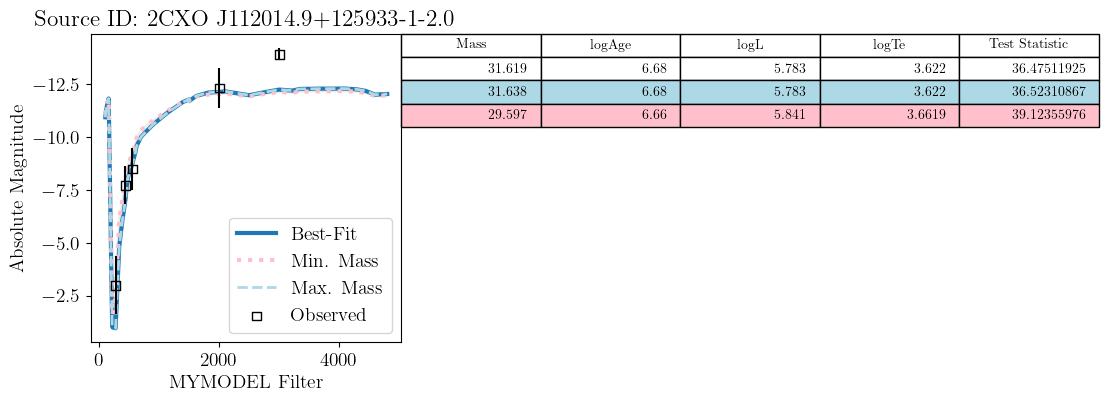

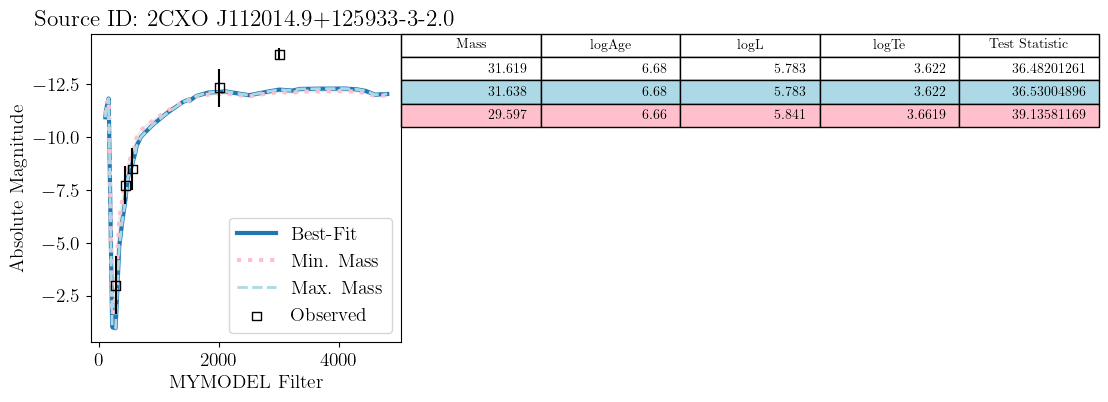

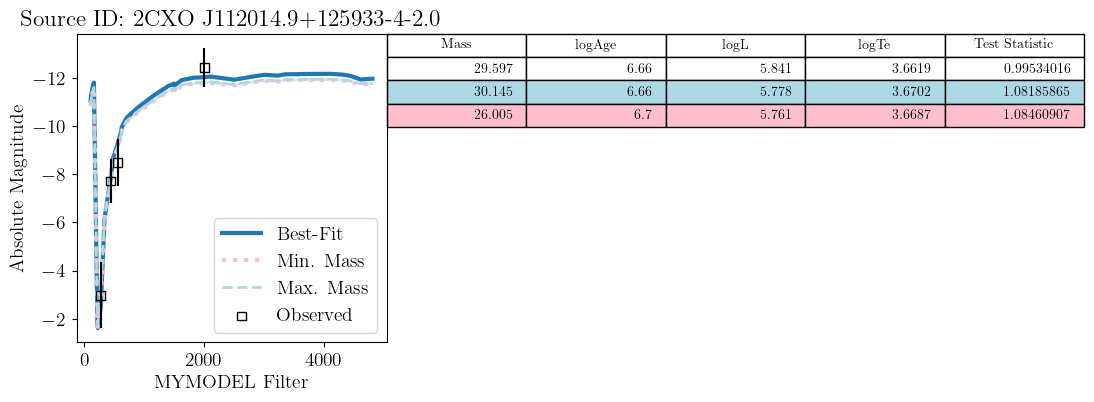

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol_x,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,mbol_y,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M,Test Statistic,Auxiliary ID
0,0.0152,0.01508,6.68,40.000000,2.632607,31.619,5.783,3.6220,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.000037,0.0,0.6013,0.3835,0.001095,0.005683,0.003222,-1.0,0.01513,-9.688,-1.049,-0.990,-0.952,-4.811,-6.079,-7.012,-8.017,-8.741,-9.275,-9.568,-10.232,-10.338,-10.926,-11.138,-11.367,-11.612,-11.814,-9.688,-10.005,-10.584,-11.166,-11.772,-12.125,-12.120,-12.274,-12.176,-11.693,-12.190,-11.654,-11.936,-12.096,-12.155,-11.970,-12.236,-12.268,-12.279,-12.285,-12.246,-11.996,-12.028,36.475119,2CXO J112014.9+125933-1-2.0
1,0.0152,0.01508,6.68,40.000000,2.632607,31.619,5.783,3.6220,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.000037,0.0,0.6013,0.3835,0.001095,0.005683,0.003222,-1.0,0.01513,-9.688,-1.049,-0.990,-0.952,-4.811,-6.079,-7.012,-8.017,-8.741,-9.275,-9.568,-10.232,-10.338,-10.926,-11.138,-11.367,-11.612,-11.814,-9.688,-10.005,-10.584,-11.166,-11.772,-12.125,-12.120,-12.274,-12.176,-11.693,-12.190,-11.654,-11.936,-12.096,-12.155,-11.970,-12.236,-12.268,-12.279,-12.285,-12.246,-11.996,-12.028,36.482013,2CXO J112014.9+125933-3-2.0
2,0.0152,0.01508,6.68,39.995564,2.632607,31.638,5.783,3.6220,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.000036,0.0,0.6014,0.3834,0.001096,0.005680,0.003225,-1.0,0.01513,-9.687,-1.047,-0.989,-0.950,-4.809,-6.077,-7.010,-8.016,-8.740,-9.274,-9.567,-10.231,-10.337,-10.925,-11.137,-11.366,-11.611,-11.813,-9.687,-10.004,-10.584,-11.165,-11.771,-12.124,-12.119,-12.273,-12.176,-11.692,-12.190,-11.653,-11.936,-12.095,-12.155,-11.969,-12.235,-12.268,-12.278,-12.285,-12.246,-11.995,-12.028,36.523109,2CXO J112014.9+125933-1-2.0
3,0.0152,0.01508,6.68,39.995564,2.632607,31.638,5.783,3.6220,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.000036,0.0,0.6014,0.3834,0.001096,0.005680,0.003225,-1.0,0.01513,-9.687,-1.047,-0.989,-0.950,-4.809,-6.077,-7.010,-8.016,-8.740,-9.274,-9.567,-10.231,-10.337,-10.925,-11.137,-11.366,-11.611,-11.813,-9.687,-10.004,-10.584,-11.165,-11.771,-12.124,-12.119,-12.273,-12.176,-11.692,-12.190,-11.653,-11.936,-12.095,-12.155,-11.969,-12.235,-12.268,-12.278,-12.285,-12.246,-11.995,-12.028,36.530049,2CXO J112014.9+125933-3-2.0
4,0.0152,0.01508,6.66,42.919647,2.632723,29.597,5.841,3.6619,-0.332,1,0.0,0.465,0.0,0.0,0.0,0.0,0.0,-1,-0.000063,0.0,0.5167,0.4682,0.000533,0.007803,0.001605,-1.0,0.01503,-9.833,-1.808,-1.609,-2.513,-6.137,-7.035,-7.784,-8.622,-9.244,-9.699,-9.959,-10.505,-10.585,-11.052,-11.225,-11.421,-11.627,-11.797,-9.833,-10.321,-10.779,-11.254,-11.760,-12.023,-12.036,-12.150,-12.075,-11.673,-12.088,-11.660,-11.900,-12.001,-12.049,-11.919,-12.123,-12.145,-12.155,-12.164,-12.132,-11.930,-11.960,39.123560,2CXO J112014.9+125933-1-2.0
5,0.0152,0.01508,6.66,42.919647,2.632723,29.597,5.841,3.6619,-0.332,1,0.0,0.465,0.0,0.0,0.0,0.0,0.0,-1,-0.000063,0.0,0.5167,0.4682,0.000533,0.007803,0.001605,-1.0,0.01503,-9.833,-1.808,-1.609,-2.513,-6.137,-7.035,-7.784,-8.622,-9.244,-9.699,-9.959,-10.505,-10.585,-11.052,-11.225,-11.421,-11.627,-11.797,-9.833,-10.321,-10.779,-11.254,-11.760,-12.023,-12.036,-12.150,-12.075,-11.673,-12.088,-11.660,-11.900,-12.001,-12.049,-11.919,-12.123,-12.145,-12.155,-12.164,-12.132,-11.930,-11.960,39.135812,2CXO J112014.9+125933-3-2.0
6,0.0152,0.01508,6.66,42.829113,2.632720,30.145,5.778,3.6702,-0.228,1,0.0,0.463,0.0,0.0,0.0,0.0,0.0,-1,-0.000048,0.0,0.5649,0.4200,0.000793,0.006924,0.002253,-1.0,0.01507,-9.675,-1.853,-1.766,-3.004,-6.225,-7.063,-7.757,-8.549,-9.145,-9.583,-9.837,-10.366,-10.443,-10.880,-11.045,-11.232,-11.432,-11.600,-9.675,-10.185,-10.629,-11.072,-11.563,-11.807,-11.826,-11.929,-11.870,-11.473,-11.873,-11.462,-11.

In [8]:
bestfit = FitSED(
    df=source1,
    input_model='/Users/undergradstudent/Downloads/wfc3_nircam_models.txt',
    idheader='Auxiliary ID',
    instrument='MyModel',
    min_models=3
)

bestfit

Finding best-fit model(s)...
DONE


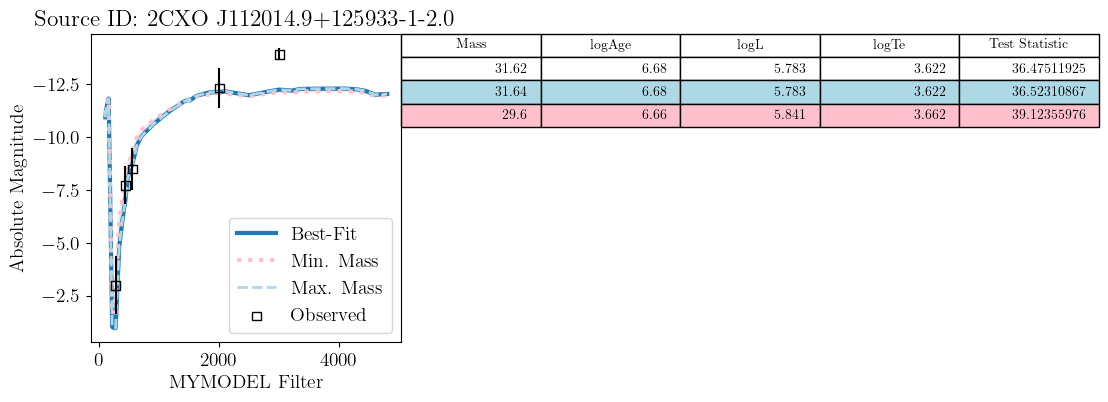

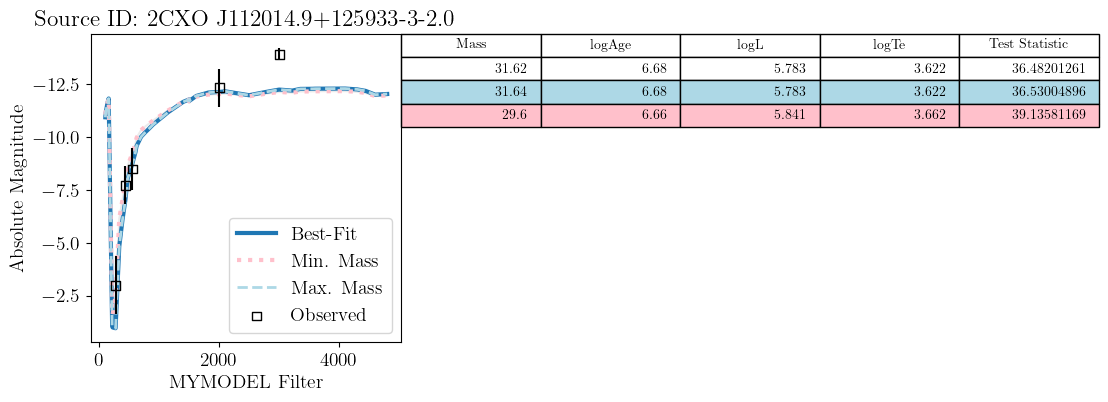

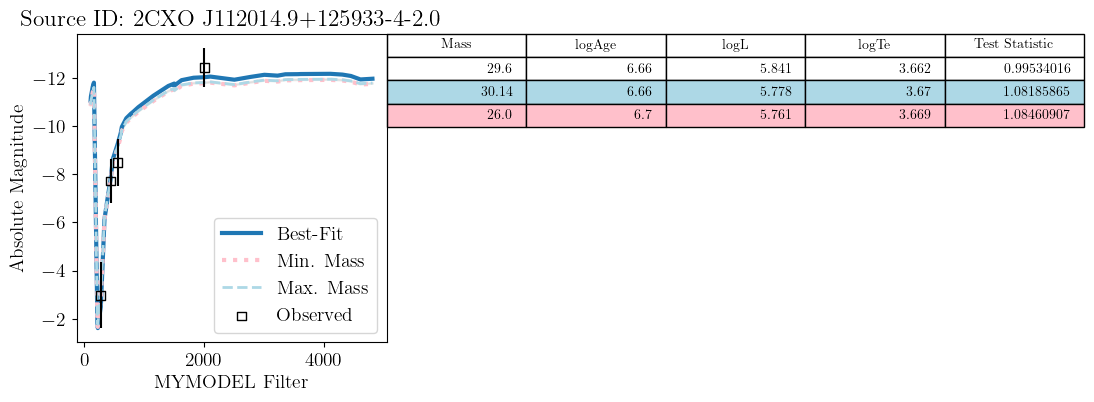

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbol_x,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,mbol_y,F700W,F900W,F1150W,F1500W,F2000W,F2770W,F3560W,F4440W,F1500W2,F3220W2,F1400M,F1620M,F1820M,F2100M,F2500M,F3000M,F3350M,F3600M,F4100M,F4300M,F4600M,F4800M,Test Statistic,Auxiliary ID
0,0.0152,0.01508,6.68,40.000,2.63,31.62,5.783,3.622,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.00004,0.0,0.6013,0.3835,0.001095,0.005683,0.003222,-1.0,0.01513,-9.688,-1.049,-0.990,-0.952,-4.811,-6.079,-7.012,-8.017,-8.741,-9.275,-9.568,-10.232,-10.338,-10.926,-11.138,-11.367,-11.612,-11.814,-9.688,-10.005,-10.584,-11.166,-11.772,-12.125,-12.120,-12.274,-12.176,-11.693,-12.190,-11.654,-11.936,-12.096,-12.155,-11.970,-12.236,-12.268,-12.279,-12.285,-12.246,-11.996,-12.028,36.475119,2CXO J112014.9+125933-1-2.0
1,0.0152,0.01508,6.68,40.000,2.63,31.62,5.783,3.622,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.00004,0.0,0.6013,0.3835,0.001095,0.005683,0.003222,-1.0,0.01513,-9.688,-1.049,-0.990,-0.952,-4.811,-6.079,-7.012,-8.017,-8.741,-9.275,-9.568,-10.232,-10.338,-10.926,-11.138,-11.367,-11.612,-11.814,-9.688,-10.005,-10.584,-11.166,-11.772,-12.125,-12.120,-12.274,-12.176,-11.693,-12.190,-11.654,-11.936,-12.096,-12.155,-11.970,-12.236,-12.268,-12.279,-12.285,-12.246,-11.996,-12.028,36.482013,2CXO J112014.9+125933-3-2.0
2,0.0152,0.01508,6.68,39.996,2.63,31.64,5.783,3.622,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.00004,0.0,0.6014,0.3834,0.001096,0.005680,0.003225,-1.0,0.01513,-9.687,-1.047,-0.989,-0.950,-4.809,-6.077,-7.010,-8.016,-8.740,-9.274,-9.567,-10.231,-10.337,-10.925,-11.137,-11.366,-11.611,-11.813,-9.687,-10.004,-10.584,-11.165,-11.771,-12.124,-12.119,-12.273,-12.176,-11.692,-12.190,-11.653,-11.936,-12.095,-12.155,-11.969,-12.235,-12.268,-12.278,-12.285,-12.246,-11.995,-12.028,36.523109,2CXO J112014.9+125933-1-2.0
3,0.0152,0.01508,6.68,39.996,2.63,31.64,5.783,3.622,-0.405,1,0.0,0.443,0.0,0.0,0.0,0.0,0.0,-1,-0.00004,0.0,0.6014,0.3834,0.001096,0.005680,0.003225,-1.0,0.01513,-9.687,-1.047,-0.989,-0.950,-4.809,-6.077,-7.010,-8.016,-8.740,-9.274,-9.567,-10.231,-10.337,-10.925,-11.137,-11.366,-11.611,-11.813,-9.687,-10.004,-10.584,-11.165,-11.771,-12.124,-12.119,-12.273,-12.176,-11.692,-12.190,-11.653,-11.936,-12.095,-12.155,-11.969,-12.235,-12.268,-12.278,-12.285,-12.246,-11.995,-12.028,36.530049,2CXO J112014.9+125933-3-2.0
4,0.0152,0.01508,6.66,42.920,2.63,29.60,5.841,3.662,-0.332,1,0.0,0.465,0.0,0.0,0.0,0.0,0.0,-1,-0.00006,0.0,0.5167,0.4682,0.000533,0.007803,0.001605,-1.0,0.01503,-9.833,-1.808,-1.609,-2.513,-6.137,-7.035,-7.784,-8.622,-9.244,-9.699,-9.959,-10.505,-10.585,-11.052,-11.225,-11.421,-11.627,-11.797,-9.833,-10.321,-10.779,-11.254,-11.760,-12.023,-12.036,-12.150,-12.075,-11.673,-12.088,-11.660,-11.900,-12.001,-12.049,-11.919,-12.123,-12.145,-12.155,-12.164,-12.132,-11.930,-11.960,39.123560,2CXO J112014.9+125933-1-2.0
5,0.0152,0.01508,6.66,42.920,2.63,29.60,5.841,3.662,-0.332,1,0.0,0.465,0.0,0.0,0.0,0.0,0.0,-1,-0.00006,0.0,0.5167,0.4682,0.000533,0.007803,0.001605,-1.0,0.01503,-9.833,-1.808,-1.609,-2.513,-6.137,-7.035,-7.784,-8.622,-9.244,-9.699,-9.959,-10.505,-10.585,-11.052,-11.225,-11.421,-11.627,-11.797,-9.833,-10.321,-10.779,-11.254,-11.760,-12.023,-12.036,-12.150,-12.075,-11.673,-12.088,-11.660,-11.900,-12.001,-12.049,-11.919,-12.123,-12.145,-12.155,-12.164,-12.132,-11.930,-11.960,39.135812,2CXO J112014.9+125933-3-2.0
6,0.0152,0.01508,6.66,42.829,2.63,30.14,5.778,3.670,-0.228,1,0.0,0.463,0.0,0.0,0.0,0.0,0.0,-1,-0.00005,0.0,0.5649,0.4200,0.000793,0.006924,0.002253,-1.0,0.01507,-9.675,-1.853,-1.766,-3.004,-6.225,-7.063,-7.757,-8.549,-9.145,-9.583,-9.837,-10.366,-10.443,-10.880,-11.045,-11.232,-11.432,-11.600,-9.675,-10.185,-10.629,-11.072,-11.563,-11.807,-11.826,-11.929,-11.870,-11.473,-11.873,-11.462,-11.703,-11.788,-11.829,-11.718,-11.904,-11.924,-11.933,-11.942,-11.914,-1

In [9]:
bestfit = FitSED(
    df=source1,
    input_model='/Users/undergradstudent/Downloads/wfc3_nircam_models_rounded.txt',
    idheader='Auxiliary ID',
    instrument='MyModel',
    min_models=3
)

bestfit